## Housing prices in King County Seattle

### Introduction:

The mini-project is based on the house sale prices data of King County, Seattle. It includes homes sold between May 2014 and May 2015.

Data Source : https://www.kaggle.com/harlfoxem/housesalesprediction

Th website (info.kingcounty.gov) can provide a deeper understanding about the meaning of the different categorical columns and has been used in this analysis.

I have used Pandas, Matplotlib, Seaborn and Bokeh libraries to clean, analyze and visualize this dataset.

### Import the libraries

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.charts import Bar, Scatter, Histogram
output_notebook()

Loading BokehJS ...

### Load the dataset

Read the data into a pandas dataframe and take a quick look at the dataset.

In [71]:
# Data Retrieval
data = pd.read_csv('kc_house_data.csv')

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check out the schema of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


From the above results, it can be observed that there are 21 columns and 21613 observations in the dataset without any missing values.

### Exploratory Data Analysis

#### Question : How does the distribution of housing prices in King County look like? What is the average housing price?

To answer this question, let's add a new column in the dataset with housing prices in 1000s.

In [75]:
# Add a new column to convert the price to price in thousands
data['Price(in thousands)'] = data['price']/1000.00

# Histogram to visualize the distribution of housing prices.
p = Histogram(data['Price(in thousands)'],bins=30, title="Distribution of housing prices in Seattle",height=300,width=500)
show(p)

Skewed distribution and OUTLIERS Present!!!Clearly there are some housing properties with exceptionally highly value. Let's find out more.

In [8]:
print "Median housing prices : {}".format(data['Price(in thousands)'].median())
print "Mean housing prices : {}".format(data['Price(in thousands)'].mean())
print "Variation in housing prices : {}".format(data['Price(in thousands)'].std())

Median housing prices : 450.0
Mean housing prices : 540.088141767
Variation in housing prices : 367.127196483


In [6]:
# Culling the data for prices greater than 4,00,0000
data[data['Price(in thousands)']>4000][['Price(in thousands)','yr_built','yr_renovated','sqft_living','sqft_basement','sqft_lot','bathrooms','bedrooms','floors','waterfront','condition','grade','view']]

,Price(in thousands),yr_built,yr_renovated,sqft_living,sqft_basement,sqft_lot,bathrooms,bedrooms,floors,waterfront,condition,grade,view
1164,5110.8,1999,0,8010,2020,45517,5.25,5,2.0,1,3,12,4
1315,5300.0,1991,0,7390,2390,24829,6.00,6,2.0,1,4,12,4
1448,5350.0,2009,0,8000,1280,23985,5.00,5,2.0,0,3,12,4
2626,4500.0,2004,0,6640,290,40014,5.50,5,2.0,1,3,12,4
3914,7062.5,1940,2001,10040,2360,37325,4.50,5,2.0,1,3,11,2
4411,5570.0,2001,0,9200,3000,35069,5.75,5,2.0,0,3,13,0
7252,7700.0,1910,1987,12050,3480,27600,8.00,6,2.5,0,4,13,3
8092,4668.0,1983,2009,9640,4820,13068,6.75,5,1.0,1,3,12,4
8638,4489.0,2001,0,6430,0,27517,3.00,4,2.0,0,3,12,0
9254,6885.0,2001,0,9890,1030,31374,7.75,6,2.0,0,3,13,4


The most expensive property in King County of Seattle is 77,00,000 USD with 8 bathrooms and 6 bedrooms. Huge living and lot area too.It has been graded 13 which means it is a mansion with custom design and large no.of highest quality cabinet, work wood trim etc..And it is in good condition with no obvious maintenance required.

The second most expensive house is 70,62,000 USD with 4.5 bathrooms and 5 bedrooms and waterfront view.

Let's look at the values for the cheapest property.

In [7]:
# Culling the data on cheapest property
minPrice=data['Price(in thousands)'].min()

data[data['Price(in thousands)'] == minPrice][['Price(in thousands)','yr_built','yr_renovated','sqft_living','sqft_basement','sqft_lot','bathrooms','bedrooms','floors','waterfront','condition','grade','view']]

,Price(in thousands),yr_built,yr_renovated,sqft_living,sqft_basement,sqft_lot,bathrooms,bedrooms,floors,waterfront,condition,grade,view
1149,75.0,1966,0,670,0,43377,0.0,1,1.0,0,3,3,0


The cheapest property was built is more than 50 years old with average condition where few repairs and refinishing is required. 

In [9]:
#Summary of prices, bedrooms, bathrooms, living area, lot area etc..
data[['Price(in thousands)','bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']].describe()

,Price(in thousands),bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,540.088142,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045
std,367.127196,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043
min,75.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000
25%,321.950000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000
50%,450.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000
75%,645.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000
max,7700.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000


As noted, the median housing price in thousands is 450.0 and mean is 540.088 which confirms the skewness in its distribution. The standard deviation of 367.12 confirms very high variation in housing prices. 

#### Question : Which factors are correlated with the housing prices in King County? 

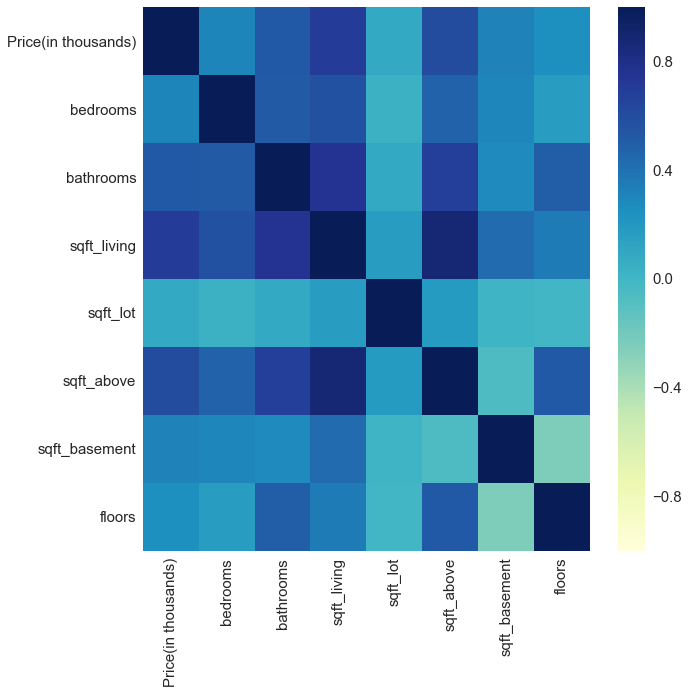

In [86]:
# Heatmap to show strength of relationship between numerical variables
subset = data[['Price(in thousands)','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','floors']]
fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(subset.corr(),cmap="YlGnBu")

The dark blue color in the heatmap shows that there is a strong correlation between price and sqft of the living area. Signification relationship can also be observed between bathrooms & sqft of the living area, bedrooms & bathrooms.

These relationships sound very intuitive e.g : price of the property can definitely be expected to go up with the living area. We can expect higher no. of rooms and bathrooms with increase in sqft of the living area.

Let's zoom out their one to one relationships using scatter plots.
 


In [96]:
# Correlation between variables 
subset.corr()

,Price(in thousands),bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,floors
Price(in thousands),1.000000,0.308350,0.525138,0.702035,0.089661,0.605567,0.323816,0.256794
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.477600,0.303093,0.175429
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.685342,0.283770,0.500653
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.876597,0.435043,0.353949
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,0.183512,0.015286,-0.005201
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,1.000000,-0.051943,0.523885
sqft_basement,0.323816,0.303093,0.283770,0.435043,0.015286,-0.051943,1.000000,-0.245705
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,0.523885,-0.245705,1.000000


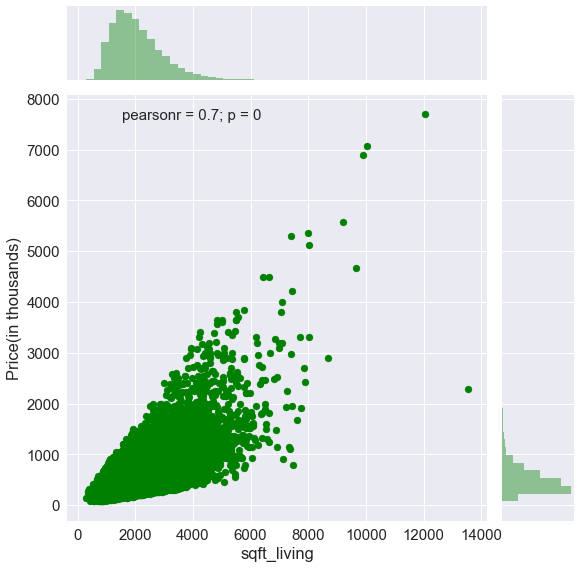

In [107]:
# Joinplot to visualize the relationship between prices(in thousands) and sqft_living
ax=sns.jointplot(x="sqft_living", y="Price(in thousands)", data=data,size=8,color='green')

Overall there seems to a positive relationship between sqft of the living area and housing price. Both of them have their distribution skewed to the right and contain outliers as well. 

But,there is an interesting property with huge living area but fairly moderate price. This implies that even if sqft of the living area is highly correlated to the price of the housing property but there are other lurking varibles present as well.

Let's zoom out that property to see if we can find any thing interesting.

In [141]:
temp=data[data['sqft_living']>13000].T
temp.rename(columns={12777:'values'},inplace=True)
print temp

                              values
id                        1225069038
date                 20140505T000000
price                       2.28e+06
bedrooms                           7
bathrooms                          8
sqft_living                    13540
sqft_lot                      307752
floors                             3
waterfront                         0
view                               4
condition                          3
grade                             12
sqft_above                      9410
sqft_basement                   4130
yr_built                        1999
yr_renovated                       0
zipcode                        98053
lat                          47.6675
long                        -121.986
sqft_living15                   4850
sqft_lot15                    217800
Price(in thousands)             2280


There house is 19 years old and in average condition, but it has never been renovated. According the information on info.kingcounty.gov this property has evidence of deferred maintainance and it needs minor repairs/refinishings. However, it has custom design built. All materials are of highest quality and all conveniences are present. Probably if this property is renovated, the price might shoot up if other lurking factors are taken into account.

Location of the house is another very important factor governing it's price.

Let's locate the properties on the map of Seattle.

Median house value in King County: 450000.0
75th percentile values in King County: 645000.0


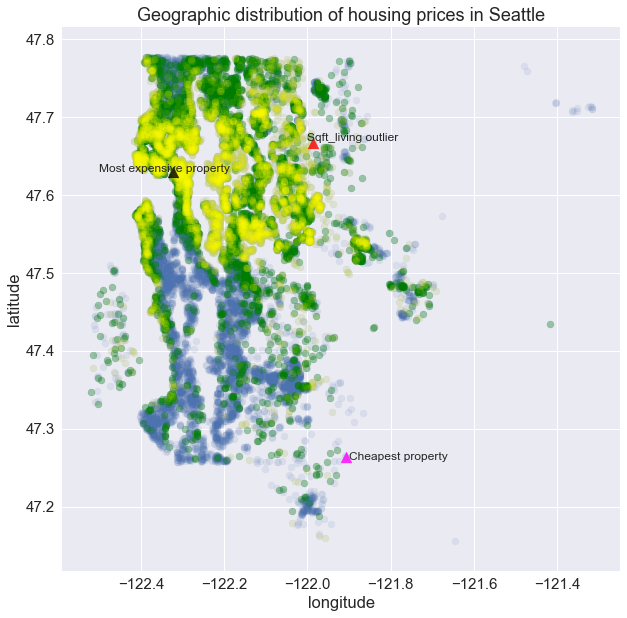

In [169]:
# Scatter plot to see distribution of prices between 2nd & 3rd quartile , and above 3rd quartile
median=data['price'].quantile(0.5)
thirdquantile=data['price'].quantile(0.75)

print "Median house value in King County: {}".format(median)
print "75th percentile values in King County: {}".format(thirdquantile)


fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter(data['long'],data['lat'],alpha=.1)
plt.scatter(data[(data.price> median)&(data.price< thirdquantile)].long,data[(data.price> median)&(data.price<thirdquantile)].lat,alpha=0.3,color='green')
plt.scatter(data[data.price> thirdquantile].long,data[data.price> thirdquantile].lat,alpha=0.1,color='yellow')
plt.scatter(data[data.price==2280000].long,data[data.price==2280000].lat,alpha=0.8,color='red',marker='^',s=120)
plt.scatter(data[data.price==7700000].long,data[data.price==7700000].lat,alpha=0.8,color='black',marker='^',s=120)
plt.scatter(data[data.price==75000].long,data[data.price==75000].lat,alpha=0.8,color='magenta',marker='^',s=120)
ax.annotate('Most expensive property', (-122.5,47.63),fontsize=12)
ax.annotate('Sqft_living outlier', (-122,47.67),fontsize=12)
ax.annotate('Cheapest property', (-121.9,47.26),fontsize=12)


plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geographic distribution of housing prices in Seattle')
plt.savefig('Geography.png')

Clearly from the above plot, the houses above 75th percentile price(64,50,00.0 USD)/(yellow points) are mostly found in the middle. The mid range houses that are between median price(45,00,00.0 USD) and 75th percentile(645000.0 USD) are scattered throughout the the Seattle area. Actually the north Seattle is densely populated with these mid range house.

In [176]:
# Plot to study relationship between housing price in thousands with sqft of the basement

print "Correlation coefficient between sqft of basement and Price in thousands :{}".format(stats.pearsonr(data['sqft_basement'],data['Price(in thousands)'])[0])

p = Scatter(data, x='sqft_basement', y='Price(in thousands)', title="Price(in thousands) vs Sqft_basement",
            xlabel="Basement Area", ylabel="price",color='navy')
show(p)


Correlation coefficient between sqft of basement and Price in thousands :0.323816020712


Moderate correlation between area of basement and the value of the property. Overall the relationship is positive. However, it is interesting to note that the houses with no basement also have fairly high values. 

Again, effect of lurking variables like (No. bedrooms/bathrooms, sqft_living, sqft_lot, waterfront view, condition of the house etc)..... Afterall, there are many factors acting simultaneously which effect property value.

#### Question: Is there any relationship between no. of bedrooms/bathroom and sqft of living area?

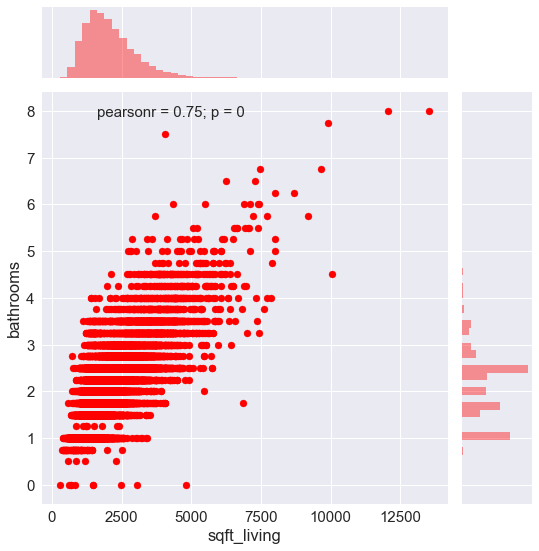

In [13]:
ax=sns.jointplot(x="sqft_living", y="bathrooms", data=data,size=8,color='red')
sns.set(font_scale=1.8)

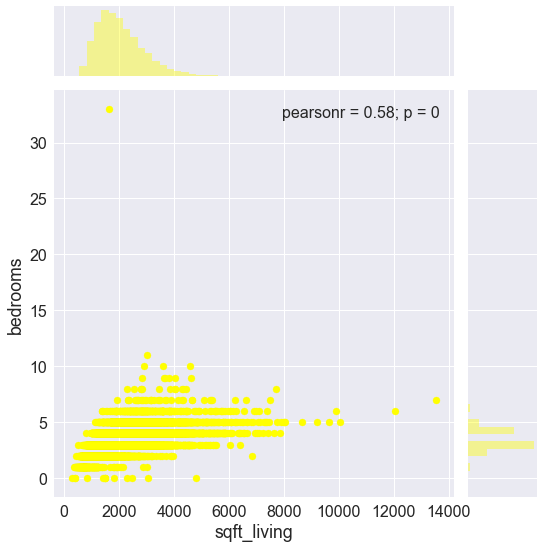

In [16]:
ax=sns.jointplot(x="sqft_living", y="bedrooms", data=data,size=8,color='yellow')
sns.set(font_scale=1.5)

Correlation coefficient does not always reflect the true relationship between the variables. It is imperative to look at the scatter plot to guage the strength of the scatter and the direction. This statement is supported by the above plot between bathrooms/bedrooms and sqft of the living area. 

Overall it can observed that no. of bathrooms/bedrooms are increasing with increase in the sqft of the living area. However, for the same no. of bathrooms/bedrooms the living area is showing a range of values. This observation makes sense because increase in the living area of a house does not necessarily mean increase in the no. of bathrooms/bedrooms. There can be many ways to include more units in the house like no. of bedrooms/bathrooms, bigger bathrooms/bedrooms, bigger basement etc...

#### Question: How does the price vary if it is lakeside property? Are there other factors that should be taken into account?

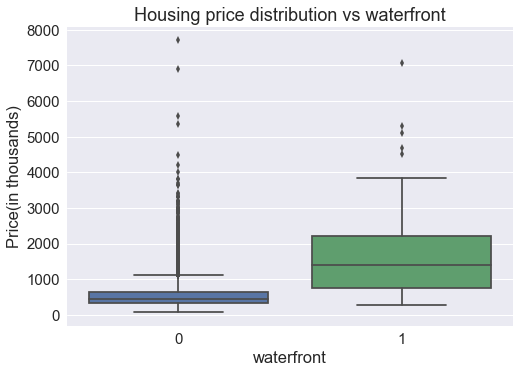

In [77]:
sns.boxplot(x='waterfront', y='Price(in thousands)',data=data)
plt.title('Housing price distribution vs waterfront')
plt.savefig('waterfront.png')

As expected, the median price of the lakeside houses are higher. But there are outliers as well. Let's look at them!!!!

In [53]:
data[data['Price(in thousands)']>7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price(in thousands)
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7062.5
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700.0


As we already observed the most expensive property (77,00,000 USD) which is located close to downtowm area does not have a waterfront view. Apart from other factors, it is probably its prime location as well which is shooting the value of the property so high.

Again, as already noted earlier the second most expensive property(70,62,500 USD) is a lakeside property.

Lets's visualize the effect of other variables like condition of the house and no. of floors in conjuction with waterfront on housing prices.

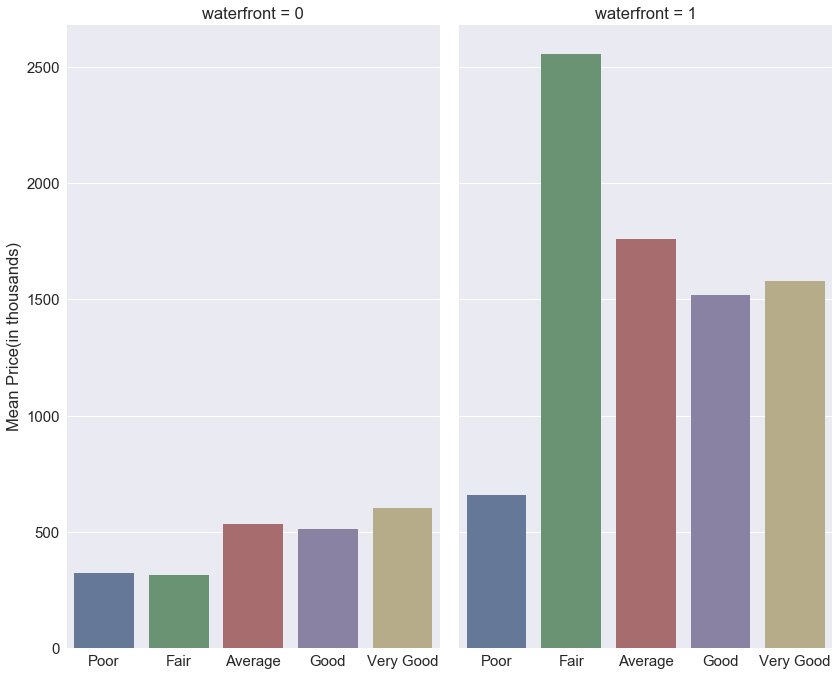

In [65]:
g = sns.factorplot(x="condition", y="Price(in thousands)", col="waterfront",
                   data=data, saturation=.5,
                    kind="bar", ci=None, aspect=.6,size=10)
(g.set_axis_labels("", "Mean Price(in thousands)")
  .set_xticklabels(["Poor", "Fair", "Average","Good","Very Good"])
  .despine(left=True))

If we exclude the outliers, we can say that lakeside properties have higher values. 

It is interesting to note that very good conditioned lakeside houses are cheaper than the ones in fair and average conditions. Not to forget,other lurking factors like grade, area of the house, no.of floors and effect of outliers are into play as well.

#### Question: How does the price vary if it is a highly graded property?

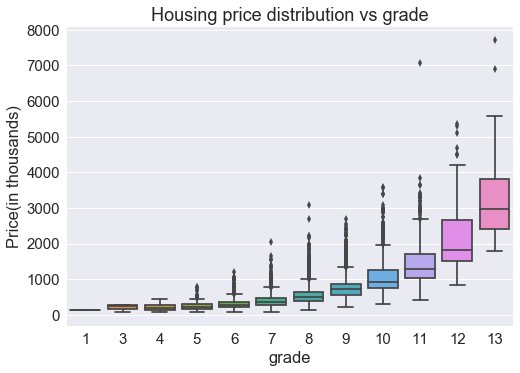

In [78]:
sns.boxplot(x='grade', y='Price(in thousands)',data=data)
plt.title('Housing price distribution vs grade')
plt.savefig('grade.png')

Overall, Clearly, highly graded houses have higher median prices as well as high variation in the prices as well.

One of the 13 grade properties(an outlier) is the most expensive property which has been pointed out earlier.
However, the second most expensive house is graded 11. This is again an outlier value which is obvious from the above box plot.

### Final thoughts :

The insights gained from this dataset can serve as a valuable tool to real state owners, realtors and developers as it can be used to predict housing prices to maximize their profits and minimize the cost of acquisition.

Until now I have explored only a subset of questions to explore, relationship between housing prices and other variables like sqft of living area/basment area, how does housing price change with different categorical variables etc..

Not to forget to mention, the relationships I have explored are observational in nature. And, I do not make any claims about causation. There are many factors/lurking variables acting simultaneously which need to be explored in depth to establish any causation.

At last, this project can be extended further by using linear and non-linear regression techniques to predict housing prices.

